In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
palette = sns.color_palette()

In [3]:
sns.set_palette(palette)
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# Preparing the Dataframe

In [4]:
if 'plots' in os.getcwd():
    print("cwd is correct")
else:
    MYDIR = ("plots")
    os.chdir("../")
    CHECK_FOLDER = os.path.isdir(MYDIR)
    ## If folder doesn't exist, then create it.
    if not CHECK_FOLDER:
        os.makedirs(MYDIR)
        print("created folder : ", MYDIR)

    else:
        print(MYDIR, "folder already exists.")

os.chdir("plots/")
print("current directroy is: ", os.getcwd())

created folder :  plots
current directroy is:  /home/hmk/Projects/Multi_Agents_Area_Exploration/analysing_data/plots


In [5]:
# check the data for NaN values or other errors
df_all = pd.read_csv(f"../../data_save/all_data.csv")

In [6]:
pd.options.display.max_columns = 500 # this will set limit of columns to 500

In [7]:
df_all.shape

(25342111, 40)

In [8]:
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.shape

(25342111, 28)

In [9]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()

In [10]:
df_all.columns

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Total Distance Travelled', 'Success', 'Seed', 'Draw Sim',
       'Log Plots', 'Use Threads', 'N Bots', 'Grid Thickness', 'Cols', 'Rows',
       'Room Area', 'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type'],
      dtype='object')

In [11]:
df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0]) for i in x.split(' ')]))
df_end = df_all.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])

In [12]:
df_agent = df_all[df_all['Loss Type'] == 'Agent']
df_agent_end = df_agent.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])

In [13]:
df_all_success = df_all[df_all['Success'] == True]

# Worst Case Scenario

In [31]:
df_all_success_four = df_all_success[df_all_success['N Bots'] == 4]

In [32]:
wost_case = df_all_success_four.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
with open(f"worst_case.txt", 'w') as f:
    f.write(wost_case.to_latex())
wost_case

/tmp/ipykernel_6224/1468896820.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  wost_case = df_all_success_four.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
/tmp/ipykernel_6224/1468896820.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(wost_case.to_latex())


,Frame Count,Replan Count,Delta Time,Update Time
M,,,,
DEGU,543,337,28.85,1.62
UC,555,562,44.99,1.61
VFHC,567,395,28.57,1.41
DEGF,592,478,33.34,1.62
FC,678,591,26.30,1.66
VFHR,685,186,24.89,1.21
G,745,392,27.57,1.53
UR,769,203,33.26,1.55
FR,932,395,46.72,1.61


# Quality Metric Table

In [33]:
# quality_metric = df_agent_end.groupby(['M']).mean()
# quality_metric['Quality'] = quality_metric['Known Area'] / quality_metric['Total Distance Travelled']
# # show quality and method
# quality_metric = quality_metric.reset_index()[['M','Quality','Known Area','Total Distance Travelled']]
# # method_group[['M','Quality']]
# quality_metric = quality_metric.sort_values(by='Quality', ascending=False)
# quality_metric.reset_index()

# with open(f"success_metric.tex", 'w') as f:
#     # f.write(df_end.groupby(['Loss Type', 'Method','Success']).count()['Experiment Id'].to_latex())
#     # rotate the table 90 degrees so the index is now the columns
#     f.write(quality_metric.to_latex())
# quality_metric

# Failed Experiment Check

In [34]:
# Total success count
print('Success Count: ', df_end['Success'].value_counts()[True])
# Total fail count
print('Fail Countsss: ', df_end['Success'].value_counts()[False])
# What is the overall success rate
print("Success rate is: ", df_end['Success'].value_counts()[True]/df_end['Success'].value_counts().sum())
total_success = df_end['Success'].value_counts()[True]
total_fail = df_end['Success'].value_counts()[False]
total_experiments = total_success + total_fail
print("Total number of experiments: ", total_experiments, "\n\n")


print(df_end[df_end['Success'] == False]['Loss Type'].value_counts())
print(df_end[df_end['Success'] == True]['Loss Type'].value_counts())
# print(df_end[df_end['Success'] == False]['Method'].value_counts())

Success Count:  173982
Fail Countsss:  28518
Success rate is:  0.8591703703703704
Total number of experiments:  202500 


Unrecoverable    28493
Disrepair           25
Name: Loss Type, dtype: int64
Agent            67500
Disrepair        67475
Unrecoverable    39007
Name: Loss Type, dtype: int64


In [35]:
df_loss_unsuccessful = df_end[df_end['Success'] == False]

# df_loss_unsuccessful_disrepair = df_loss_unsuccessful[df_loss_unsuccessful['Loss Type'] == 'Disrepair']
# df_loss_unsuccessful_disrepair['N Bots'].value_counts()
# df_loss_unsuccessful_disrepair = df_loss_unsuccessful[df_loss_unsuccessful['Loss Type'] == 'Unrecoverable']
# df_loss_unsuccessful_disrepair['N Bots'].value_counts()

df_loss_unsuccessful['N Bots'].value_counts()
# sns.barplot(y="M", x="Success Ratio", hue="Loss Type", data=method_group.reset_index())

4     16091
8      7667
12     4760
Name: N Bots, dtype: int64

In [36]:
loss_group = df_loss_unsuccessful.groupby(['M', 'N Bots']).count()['Experiment Id'].unstack()
loss_group

N Bots,4,8,12
M,,,
DEGF,1690,790,494
DEGU,1490,554,291
DFC,1435,448,285
FC,1408,716,522
FR,2156,1442,975
G,1863,953,566
UC,1198,469,290
UR,2007,1165,706
VFHC,1225,398,199


In [37]:
# df_end['Success Ratio'] 
loss_group2 = df_loss_unsuccessful.groupby(['Loss Type', 'N Bots']).count()['Experiment Id'].unstack()
# loss_group2['Total'] = loss_group2[4]+loss_group2[8] + loss_group2[12]

with open(f"loss_count_vs_agents_size.tex", 'w') as f:
    f.write(loss_group2.to_latex())

loss_group2

/tmp/ipykernel_6224/1641953233.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(loss_group2.to_latex())


N Bots,4,8,12
Loss Type,,,
Disrepair,25.0,NaN,NaN
Unrecoverable,16066.0,7667.0,4760.0


In [39]:
df_loss_unsuccessful_unrecoverable = df_loss_unsuccessful[df_loss_unsuccessful['Loss Type'] == 'Unrecoverable']

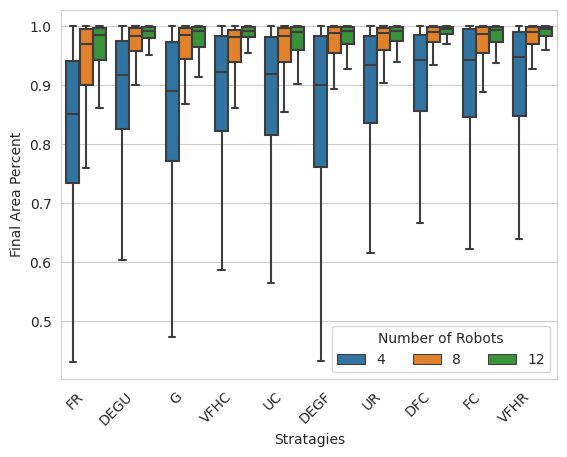

In [40]:
sns.set_style("whitegrid")
# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")
sorted_x_data = df_loss_unsuccessful_unrecoverable.groupby("M")["Area Percent"].median().sort_values().index
grd = sns.boxplot(
    data=df_loss_unsuccessful_unrecoverable, 
    y="Area Percent", x="M", hue="N Bots", 
    showfliers=False,
    order=sorted_x_data,
)
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
# make the legonf in two columns
grd.legend(ncol=3, title='Number of Robots')

grd.set_xticklabels(grd.get_xticklabels(), rotation=45, horizontalalignment='right')
# set x range 
# grd.set(ylim=(0, 310))
# set Y label
grd.set_ylabel("Final Area Percent")
grd.set_xlabel("Stratagies")
# grd.set(ylim=(0.9, 1))



plt.savefig(f"unsuccesssful_unrecoverable_analysis.png", bbox_inches='tight' ,dpi=300)

# Plots Start

In [41]:
df_end_success = df_end[df_end['Success'] == True]

with open(f"methods.tex", 'w') as f:
    # f.write(df_end_success[['Method', "M"]].drop_duplicates().reset_index(drop=True).to_latex())
    # sort alphabetically
    f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())

/tmp/ipykernel_6224/1376767921.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())


In [42]:
result = df_end_success.groupby(["M"])['Frame Count'].aggregate(np.mean).reset_index().sort_values('Frame Count')

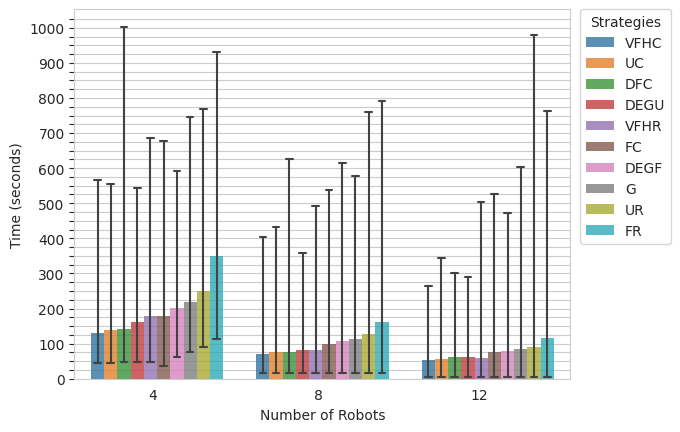

In [43]:
sns.set_style('whitegrid', rc={'ytick.left': True})

grd = sns.barplot(
    data=df_end_success,
    x="N Bots",
    y="Frame Count",
    hue = "M",
    errorbar=("pi", 101),
    errwidth=1.5,
    capsize=.04,
    linewidth=0,
    alpha=.8,
    hue_order=result['M']
)
# grd.legend(ncol=5)
grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')

grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Number of Robots")
grd.set_xticklabels(grd.get_xticklabels(), horizontalalignment='right')

plt.yticks(range(0, 1026, 25))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"exploration_completion_time_barplot.png", bbox_inches='tight' ,dpi=300)

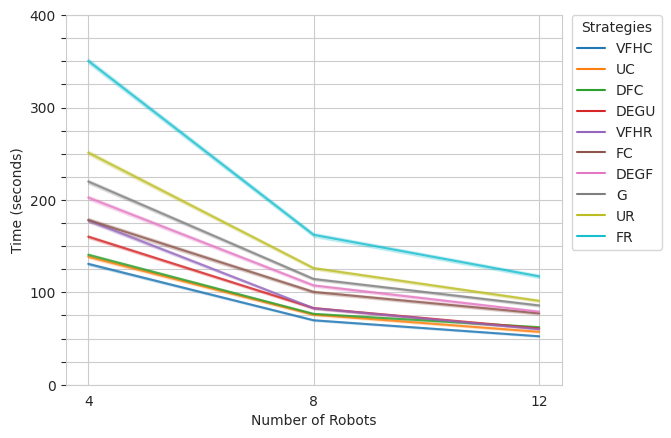

In [44]:
sns.set_style('whitegrid', rc={'ytick.left': True})

grd = sns.lineplot(
    data=df_end_success,
    x="N Bots",
    y="Frame Count",
    hue = "M",
    alpha=.8,
    hue_order=result['M']
)
# grd.legend( ncol=2,)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')

grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Number of Robots")

plt.xticks(range(4, 16, 4))
plt.yticks(range(0, 401, 25))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"exploration_completion_time_lineplot.png", bbox_inches='tight' ,dpi=300)

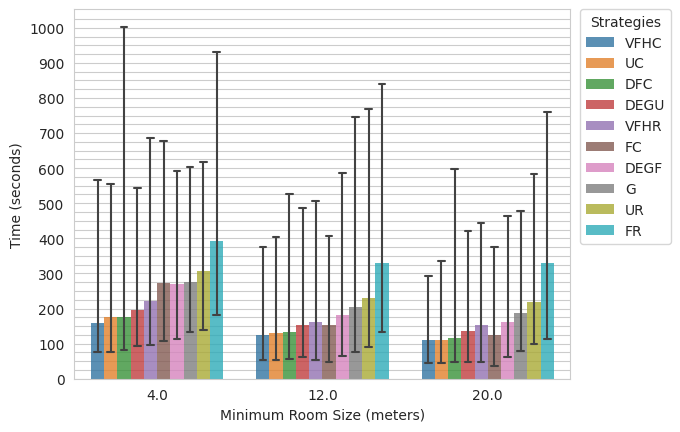

In [45]:
sns.set_style("whitegrid")
# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")

grd = sns.barplot(
    # data=df_end_success, 
    data = df_end_success[df_end_success['N Bots'] == 4],
    y="Frame Count", x="Min Room Size", hue="M", 
    # showfliers=False,
    errorbar=("pi", 100),
    errwidth=1.5,
    capsize=.04,
    # errcolor=".4",
    linewidth=0,

    # edgecolor=".5",
    alpha=.8,
    hue_order=result['M']
)
grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
# make the legonf in two columns
# grd.legend( ncol=5,)


# set x range 
# grd.set(ylim=(0, 310))
# set Y label
grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Minimum Room Size (meters)")
# grd.set(ylim=(0, 550))
# grd.set_xticklabels(rotation=30)
# plt.yticks(range(0, 310, 20))
plt.yticks(range(0, 1026, 25))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

# plt.grid(axis='y')
# plt.grid(color='gray', linestyle='dashed')
# need some cut before upload to overleaf
plt.savefig(f"room_density_vs_iteration_count_hue_strategies.png", bbox_inches='tight' ,dpi=300)

In [46]:
df_all_success

,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Success,Seed,Draw Sim,Log Plots,Use Threads,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Method,Start Scenario,Goal Scenario,Experiment Id,Loss Type,M
0,0,0.1748,0.19,0.19,257,12,0.0,0,437,15.727922,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
1,1,0.1880,0.19,0.38,245,12,0.0,1,470,30.627417,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
2,2,0.1980,0.19,0.57,233,14,0.0,2,495,46.769553,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
3,3,0.2096,0.21,0.79,222,19,0.0,3,524,62.911688,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
4,4,0.2200,0.21,1.01,212,23,0.0,4,550,79.468037,True,66,False,True,False,12,10,50,50,2500,20.0,20.0,0.0968,Unknown Random,start-Top_Left_Start,goal-Center_Start,50990,Unrecoverable,UR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25342106,149,0.9992,0.07,14.83,287,238,0.0,149,2498,1407.520995,True,66,False,True,False,8,10,50,50,2500,4.0,20.0,0.2656,Gametheory,start-Center_Start,goal-Rand_Start,85188,Agent,G
25342107,150,0.9996,0.08,14.91,279,238,0.0,150,2499,1416.763635,True,66,False,True,False,8,10,50,50,2500,4.0,20.0,0.2656,Gametheory,start-Center_Start,goal-Rand_Start,85188,Agent,G
25342108,151,0.9996,1.00,15.91,273,248,0.0,151,2499,1426.006276,True,66,False,True,False,8,10,50,50,2500,4.0,20.0,0.2656,Gametheory,start-Center_Start,goal-Rand_Start,85188,Agent,G
25342109,152,0.9996,0.08,15.99,265,248,0.0,152,2499,1436.077344,True,66,False,True,False,8,10,50,50,2500,4.0,20.0,0.2656,Gametheory,start-Center_Start,goal-Rand_Start,85188,Agent,G


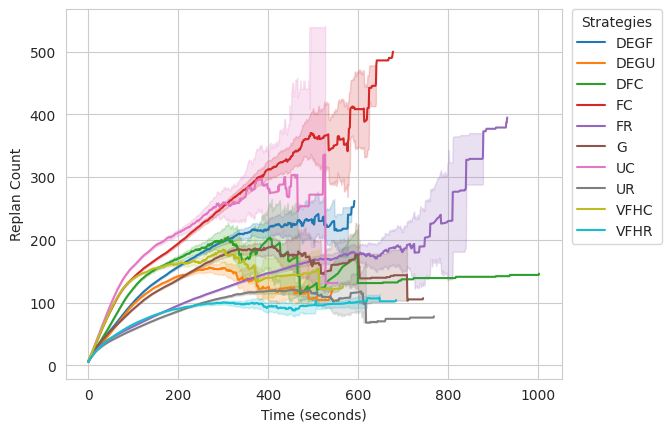

In [47]:
grd = sns.lineplot(data=df_all_success_four, x = 'Frame Count',y = 'Replan Count', hue='M')
grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
# plt.xticks(range(0, 1000, 100))
# plt.ylim(0, 600)
grd.set_ylabel("Replan Count")
grd.set_xlabel("Time (seconds)")
plt.savefig(f"time_vs_replan_count_hue_strategies_before_padding.png", bbox_inches='tight', dpi=300)

In [ ]:
grd = sns.lineplot(data=df_all_success_four, x = 'Frame Count',y = 'Replan Count', hue='Min Room Size')
grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Room Density')
# plt.xticks(range(0, 1000, 100))
# plt.ylim(0, 400)
grd.set_ylabel("Replan Count")
grd.set_xlabel("Time (seconds)")
plt.savefig(f"time_vs_replan_count_hue_density_before_padding.png", bbox_inches='tight' ,dpi=300)

# PADDING DATA AND PLOTTING 2 FIGURES WITH PAD

In [ ]:
# for i,[method, group] in enumerate(df_all_success.groupby(['M'])):
#     print("i: ", i, "Method: ", method, "Group: ", group.shape)
#     group_counts = group.groupby('Experiment Id')['Replan Count'].apply(lambda x: x.iloc[-1])
#     unique =  set(group['Frame Count'].unique())
#     data2 = group.groupby("Experiment Id").agg({"Frame Count":lambda x: unique - set(x)}).explode("Frame Count").dropna().reset_index()

#     for j in group_counts.index:
#         data2.loc[data2['Experiment Id'] == j, "Replan Count"] = group_counts[j]
#     new_data = pd.concat([group, data2]).sort_values(["Experiment Id", "Frame Count"])
    
#     count_group = new_data.groupby(['Frame Count'])
#     x_data = count_group['Replan Count'].mean()
#     sns.lineplot(x_data, label=method)
#     # sns.set_ylabels("Replan Count")
# plt.xlabel("Time (seconds)")
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')    
# plt.savefig(f"time_vs_replan_count_hue_strategies_after_padding.png", bbox_inches='tight', dpi=300)

In [ ]:
# for i,[method, group] in enumerate(df_all_success.groupby(['Min Room Size'])):
#     print("i: ", i, "Method: ", method, "Group: ", group.shape)
#     group_counts = group.groupby('Experiment Id')['Replan Count'].apply(lambda x: x.iloc[-1])
#     unique =  set(group['Frame Count'].unique())
#     data2 = group.groupby("Experiment Id").agg({"Frame Count":lambda x: unique - set(x)}).explode("Frame Count").dropna().reset_index()

#     for j in group_counts.index:
#         data2.loc[data2['Experiment Id'] == j, "Replan Count"] = group_counts[j]
#     new_data = pd.concat([group, data2]).sort_values(["Experiment Id", "Frame Count"])
    
#     count_group = new_data.groupby(['Frame Count'])
#     x_data = count_group['Replan Count'].mean()
#     sns.lineplot(x_data, label=method)
#     # sns.set_ylabels("Replan Count")
# plt.xlabel("Time (seconds)")
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')    
# plt.savefig(f"time_vs_replan_count_hue_density_after_padding.png", bbox_inches='tight', dpi=300)

# PADDING FINISH

In [ ]:
df_end_success['Goal Scenario'].unique()

In [ ]:
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Center_Start'], 'Center of Map')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Distributed_Start'], 'Equal Spread')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Edge_Start'], 'Edges of Map')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Rand_Start'], 'Random Location')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Top_Left_Start'], 'Top Left Corner')


In [ ]:
df_end_success['Goal Scenario'].unique()

In [ ]:
palet2 = sns.color_palette("bright", 10)
paletinv = palet2.reverse()
paletinv


In [ ]:
result22 = df_end_success.groupby(["Goal Scenario"])['Frame Count'].aggregate(np.mean).reset_index().sort_values('Frame Count')

In [ ]:
sns.set_style('whitegrid', rc={'ytick.left': True})

grd = sns.barplot(
    data = df_end_success[df_end_success['N Bots'] == 4],
    y="Frame Count", x="M", hue="Goal Scenario", 
    palette = palet2,
    
    errorbar=("pi", 100),
    errwidth=1.5,
    capsize=.04,
    # errcolor=".4",
    linewidth=0,
    
    order=result['M'],
    hue_order = result22['Goal Scenario']
    
    
)
# grd.legend( ncol=2)
# plt.legend(loc='upper left', title='Distribution Scenarios')
grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Distribution Scenarios')
grd.set_ylabel("Time (seconds)")
grd.set_xlabel("Strategies")
grd.set_xticklabels(grd.get_xticklabels(), horizontalalignment='right', rotation=30),

# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')

plt.yticks(range(0, 1026, 25))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 4 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"distribution_vs_segmentation.png", bbox_inches='tight' ,dpi=300)

In [ ]:
Area_max = df_all['Rows'].iloc[0] * df_all['Cols'].iloc[0]
Area_max

In [ ]:
# calculate Quality df_all for each all the data
# Quality = Area_max/Total Distance Traveled
df_all['Quality'] = Area_max/df_all['Total Distance Travelled']
df_all['Quality'].describe()

In [ ]:
# Sort the x-axis data based on "Quality"
sorted_x_data = df_all.groupby("M")["Quality"].median().sort_values().index

grd = sns.boxplot(
    data=df_all, 
    y="Quality", 
    hue="Loss Type", 
    x="M", 
    order=sorted_x_data,  # Specify the sorted x-axis data
    showfliers=False,
    # alpha=.8,
)

# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Loss Types')
grd.set_xticklabels(grd.get_xticklabels(), rotation=45, horizontalalignment='right')

# rename the x axis 
grd.set(xlabel='Strategies')
grd.set(ylabel='Distance Based Cost Metric')

plt.savefig(f"distance_cost_metric.png", dpi=300, bbox_inches='tight')
plt.show()  # Optionally display the plot